#0. 연합뉴스 토픽 분류
* [뉴스 토픽 분류 AI 경진대회 - DACON](https://dacon.io/competitions/official/235747/overview/description)
* [KLUE Benchmark](https://klue-benchmark.com/)

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 데이터 로드

In [3]:
import os, platform
base_path = "data/klue/"

def file_exist_check(base_path):
    if os.path.exists(f"{base_path}train_data.csv"):
        print("파일이 이미 있음")
        return
    
    if platform.system() == "Linux":
        print(f"파일을 다운로드 하고 {base_path} 경로에 압축을 해제함")
        !wget https://bit.ly/dacon-klue-open-zip
        if not os.path.exists(base_path):
            os.makedirs(base_path)
        !unzip dacon-klue-open-zip -d data/klue
    else:
        print(f"""https://dacon.io/competitions/official/235747/data 에서 다운로드 하세요.""")
    return
    
file_exist_check(base_path) 

파일이 이미 있음


In [4]:
train = pd.read_csv(f"{base_path}train_data.csv", index_col="index")
test = pd.read_csv(f"{base_path}test_data.csv", index_col="index")
topic = pd.read_csv(f"{base_path}topic_dict.csv")

#1. 전처리, EDA

## 데이터 병합하기

In [5]:
train

title  topic_idx
index                                               
0                인천→핀란드 항공기 결항…휴가철 여행객 분통          4
1          실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합          4
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망          4
...                                   ...        ...
45649        KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략          1
45650     1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토          2
45651         게시판 키움증권 2020 키움 영웅전 실전투자대회          1
45652                   답변하는 배기동 국립중앙박물관장          2
45653  2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후          2

[45654 rows x 2 columns]

In [6]:
test

title
index                                 
45654       유튜브 내달 2일까지 크리에이터 지원 공간 운영
45655          어버이날 맑다가 흐려져…남부지방 옅은 황사
45656      내년부터 국가RD 평가 때 논문건수는 반영 않는다
45657  김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것
45658   회색인간 작가 김동식 양심고백 등 새 소설집 2권 출간
...                                ...
54780     인천 오후 3시35분 대설주의보…눈 3.1cm 쌓여
54781    노래방에서 지인 성추행 외교부 사무관 불구속 입건종합
54782     40년 전 부마항쟁 부산 시위 사진 2점 최초 공개
54783    게시판 아리랑TV 아프리카개발은행 총회 개회식 생중계
54784  유영민 과기장관 강소특구는 지역 혁신의 중심…지원책 강구

[9131 rows x 1 columns]

In [7]:
topic

topic  topic_idx
0  IT과학          0
1    경제          1
2    사회          2
3  생활문화          3
4    세계          4
5   스포츠          5
6    정치          6

In [8]:
train = train.merge(topic, how="left")

In [9]:
train

title  topic_idx topic
0                인천→핀란드 항공기 결항…휴가철 여행객 분통          4    세계
1          실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4    세계
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4    세계
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합          4    세계
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망          4    세계
...                                   ...        ...   ...
45649        KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략          1    경제
45650     1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토          2    사회
45651         게시판 키움증권 2020 키움 영웅전 실전투자대회          1    경제
45652                   답변하는 배기동 국립중앙박물관장          2    사회
45653  2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후          2    사회

[45654 rows x 3 columns]

## EDA

In [10]:
train["topic"].value_counts()

세계      7629
사회      7362
스포츠     6933
정치      6751
경제      6222
생활문화    5933
IT과학    4824
Name: topic, dtype: int64

<AxesSubplot:xlabel='topic', ylabel='count'>

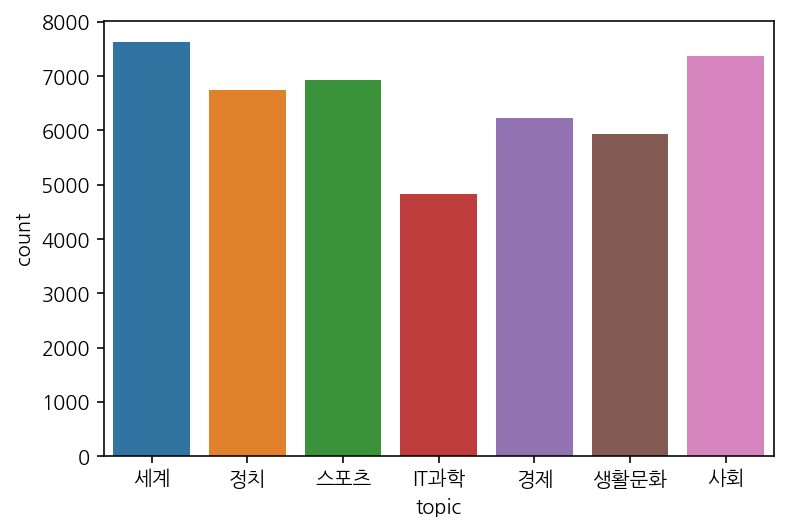

In [11]:
sns.countplot(data=train, x="topic")

In [12]:
train["word_count"] = train["title"].map(lambda x : len(x.split()))

In [13]:
train

title  topic_idx topic  word_count
0                인천→핀란드 항공기 결항…휴가철 여행객 분통          4    세계           5
1          실리콘밸리 넘어서겠다…구글 15조원 들여 美전역 거점화          4    세계           6
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4    세계           8
3        NYT 클린턴 측근韓기업 특수관계 조명…공과 사 맞물려종합          4    세계           7
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망          4    세계           7
...                                   ...        ...   ...         ...
45649        KB금융 미국 IB 스티펠과 제휴…선진국 시장 공략          1    경제           7
45650     1보 서울시교육청 신종코로나 확산에 개학 연기·휴업 검토          2    사회           7
45651         게시판 키움증권 2020 키움 영웅전 실전투자대회          1    경제           6
45652                   답변하는 배기동 국립중앙박물관장          2    사회           3
45653  2020 한국인터넷기자상 시상식 내달 1일 개최…특별상 김성후          2    사회           7

[45654 rows x 4 columns]

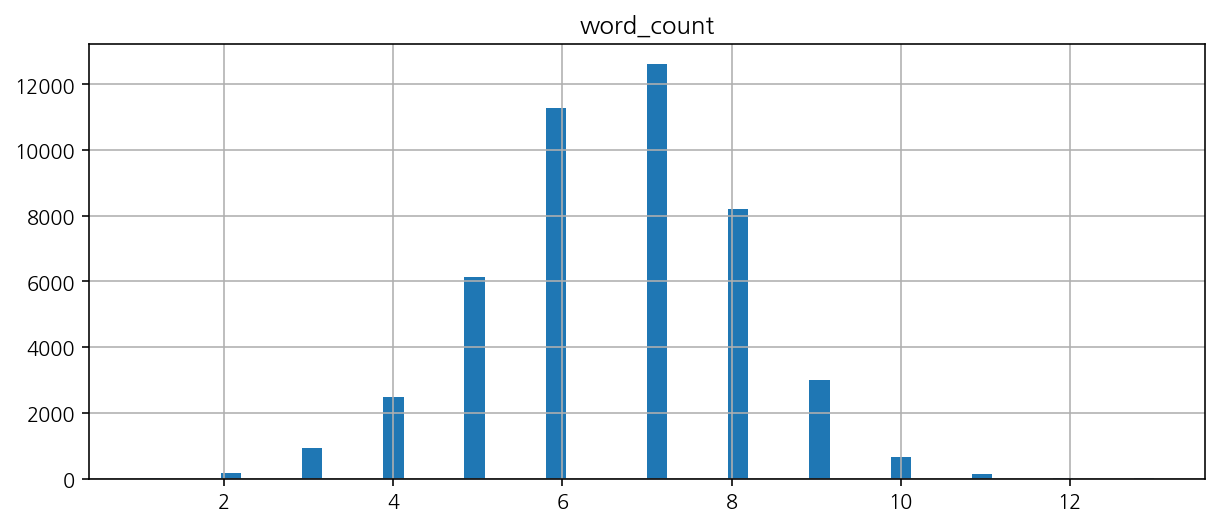

In [14]:
train[["word_count"]].hist(figsize=(10, 4), bins=50);

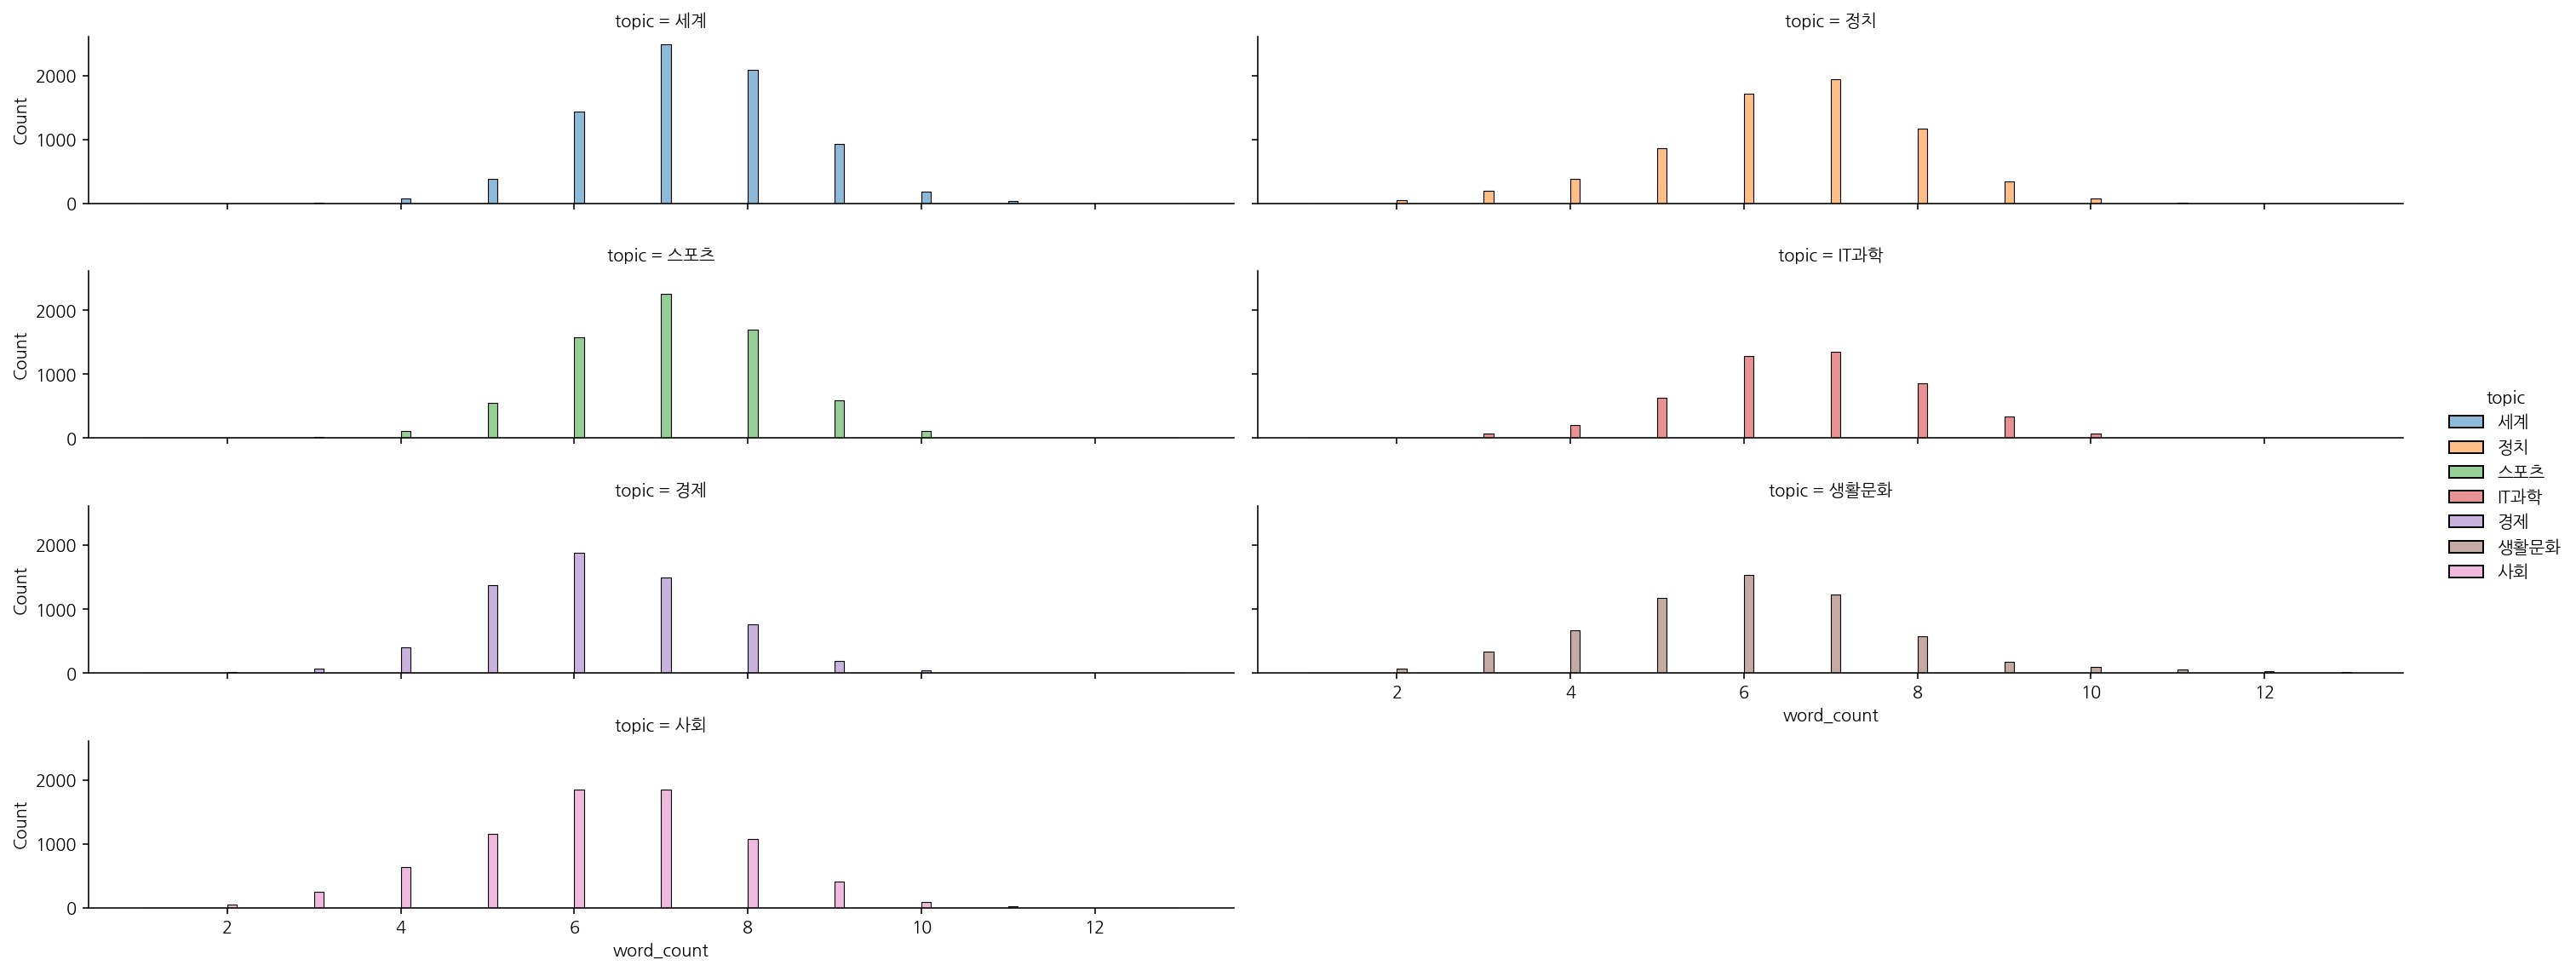

In [15]:
sns.displot(data=train, x="word_count", hue="topic",
            col="topic", col_wrap=2, aspect=5, height=2)

## 문자 전처리

In [16]:
import re

def preprocessing(text):
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 중복으로 생성된 공백값을 제거합니다.
    text = re.sub('[\s]+', ' ', text)
    # 영문자를 소문자로 만듭니다.
    text = text.lower()
    return text

In [17]:
from tqdm import tqdm
tqdm.pandas() 

train["title"] = train["title"].progress_map(preprocessing)
test["title"] = test["title"].progress_map(preprocessing)

100%|██████████| 9131/9131 [00:00<00:00, 15499.54it/s]


### 불용어 제거

In [18]:
def remove_stopwords(text):
    tokens = text.split(' ')
    stops = [ '합니다', '하는', '할', '하고', '한다', 
             '그리고', '입니다', '그', '등', '이런', '및','제', '더']
    meaningful_words = [w for w in tokens if not w in stops]
    return ' '.join(meaningful_words)

In [19]:
train["title"] = train["title"].map(remove_stopwords)
test["title"] = test["title"].map(remove_stopwords)

In [20]:
train

title  topic_idx topic  word_count
0                인천 핀란드 항공기 결항 휴가철 여행객 분통          4    세계           5
1           실리콘밸리 넘어서겠다 구글 15조원 들여 전역 거점화          4    세계           6
2          이란 외무 긴장완화 해결책은 미국이 경제전쟁 멈추는 것          4    세계           8
3        nyt 클린턴 측근 기업 특수관계 조명 공과 사 맞물려종합          4    세계           7
4               시진핑 트럼프에 중미 무역협상 조속 타결 희망          4    세계           7
...                                   ...        ...   ...         ...
45649        kb금융 미국 ib 스티펠과 제휴 선진국 시장 공략          1    경제           7
45650     1보 서울시교육청 신종코로나 확산에 개학 연기 휴업 검토          2    사회           7
45651         게시판 키움증권 2020 키움 영웅전 실전투자대회          1    경제           6
45652                   답변하는 배기동 국립중앙박물관장          2    사회           3
45653  2020 한국인터넷기자상 시상식 내달 1일 개최 특별상 김성후          2    사회           7

[45654 rows x 4 columns]

#2. 워드클라우드

* https://github.com/amueller/word_cloud

In [21]:
!pip install wordcloud
!conda install -c conda-forge wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


In [22]:
!apt-get install fonts-nanum -qq  > /dev/null
!fc-cache -fv

import matplotlib as mpl
findfont = mpl.font_manager.fontManager.findfont
mpl.font_manager.findfont = findfont
mpl.backends.backend_agg.findfont = findfont

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [23]:
from wordcloud import WordCloud

def display_word_cloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/NanumBarunGothic.ttf",
        width=width, height=height,
        stopwords=["합니다", "입니다"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

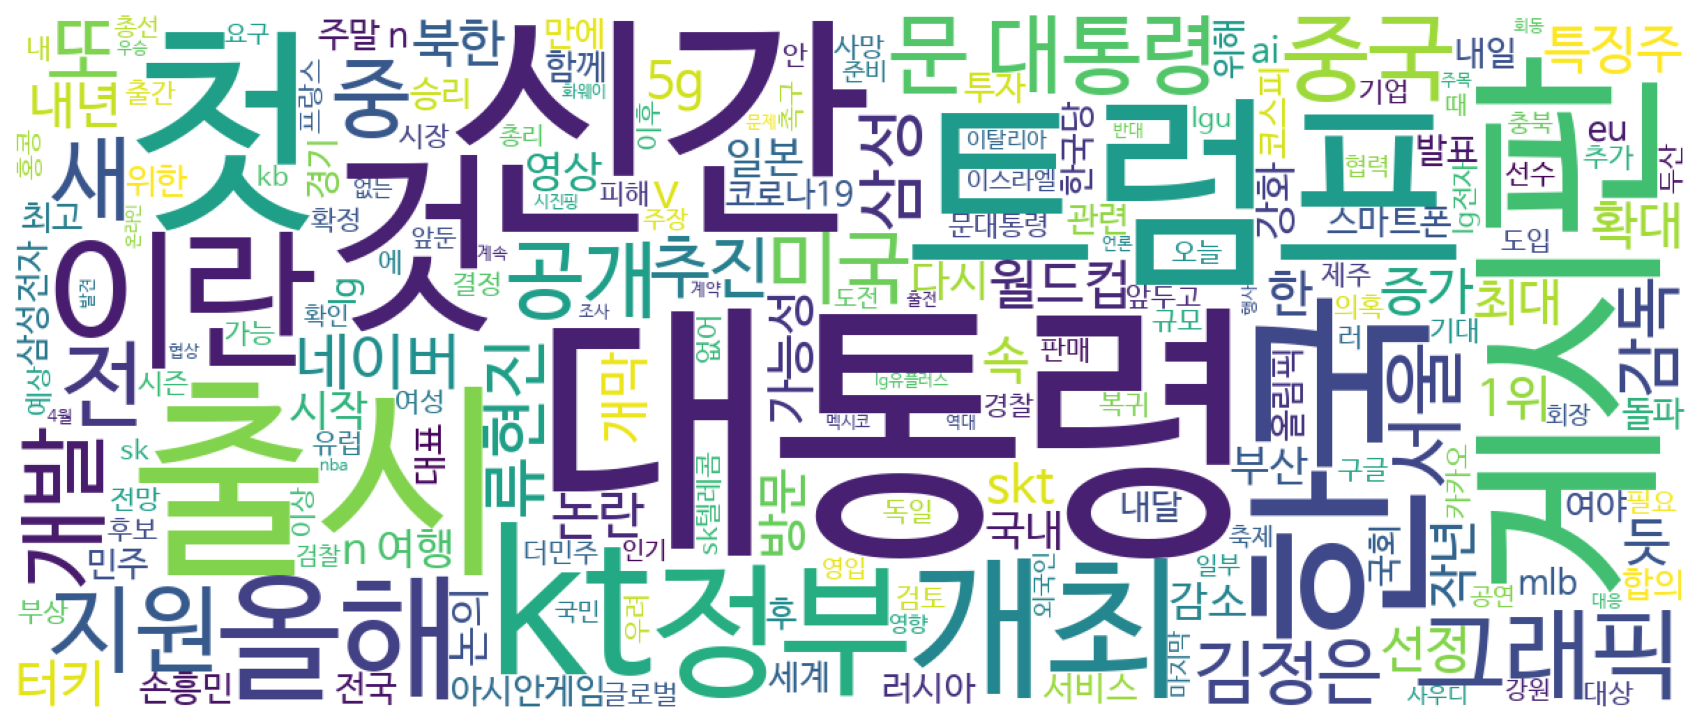

In [24]:
display_word_cloud(" ".join(train["title"]))

IT과학


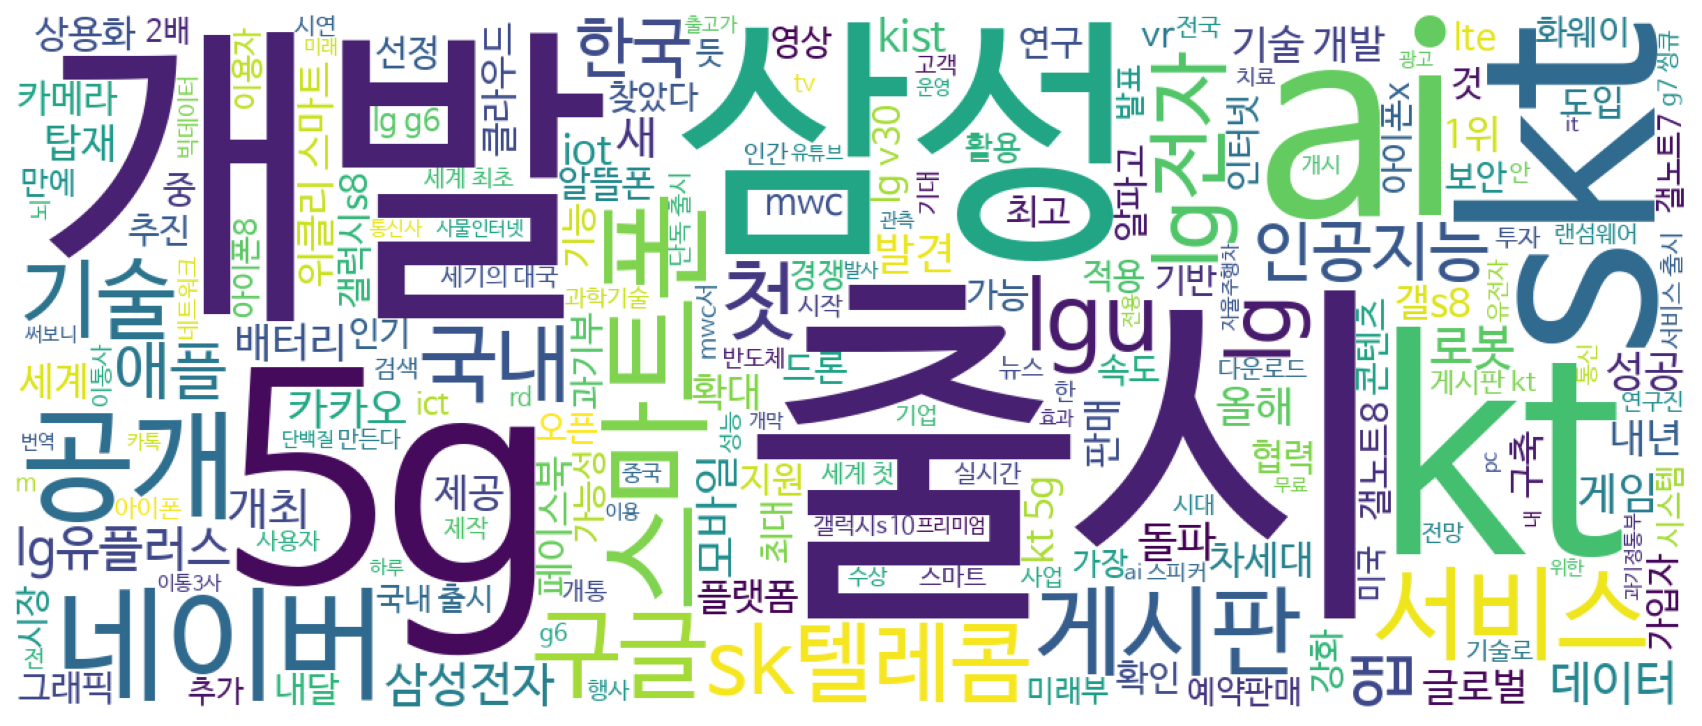

경제


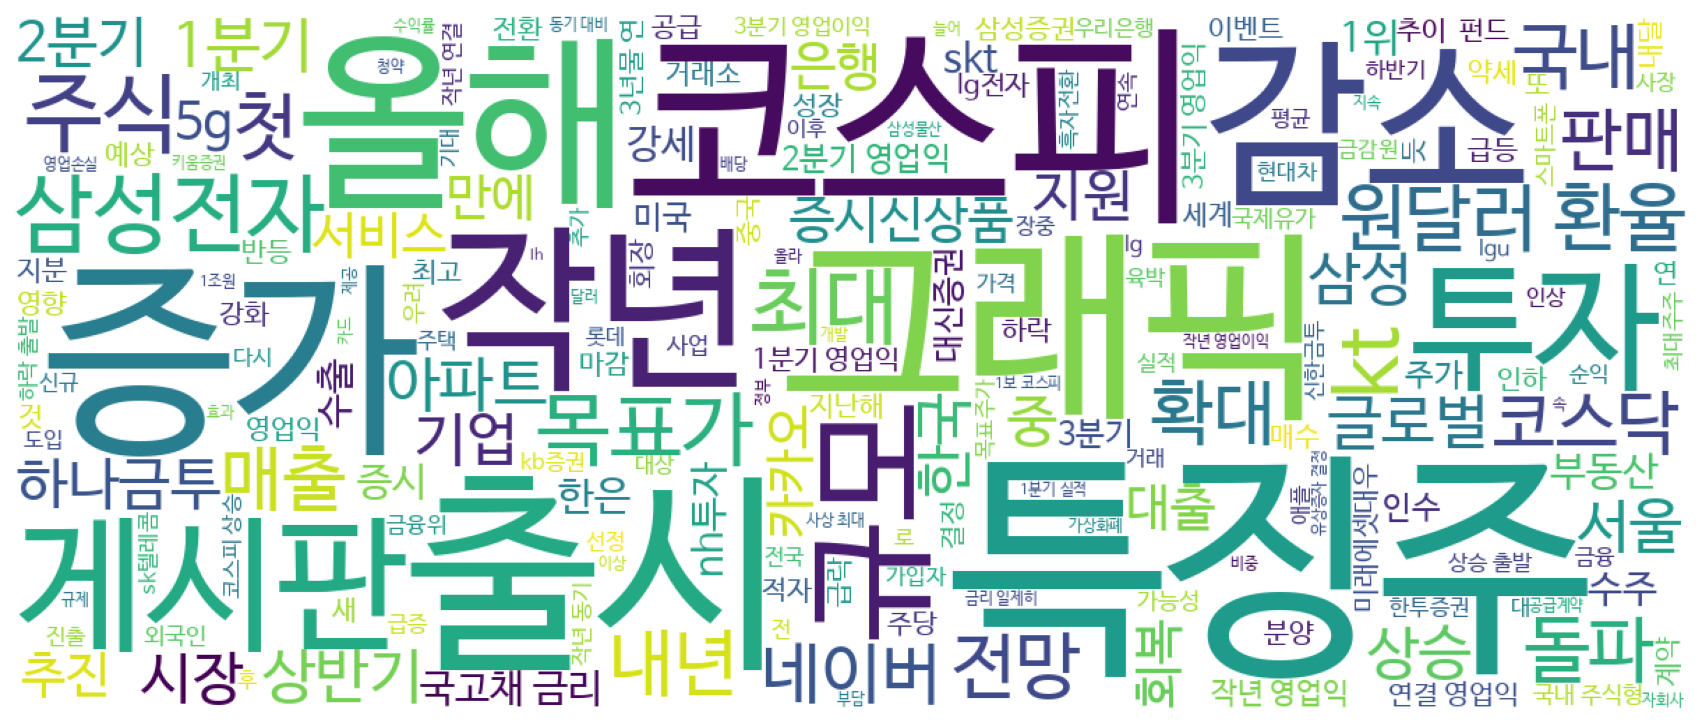

사회


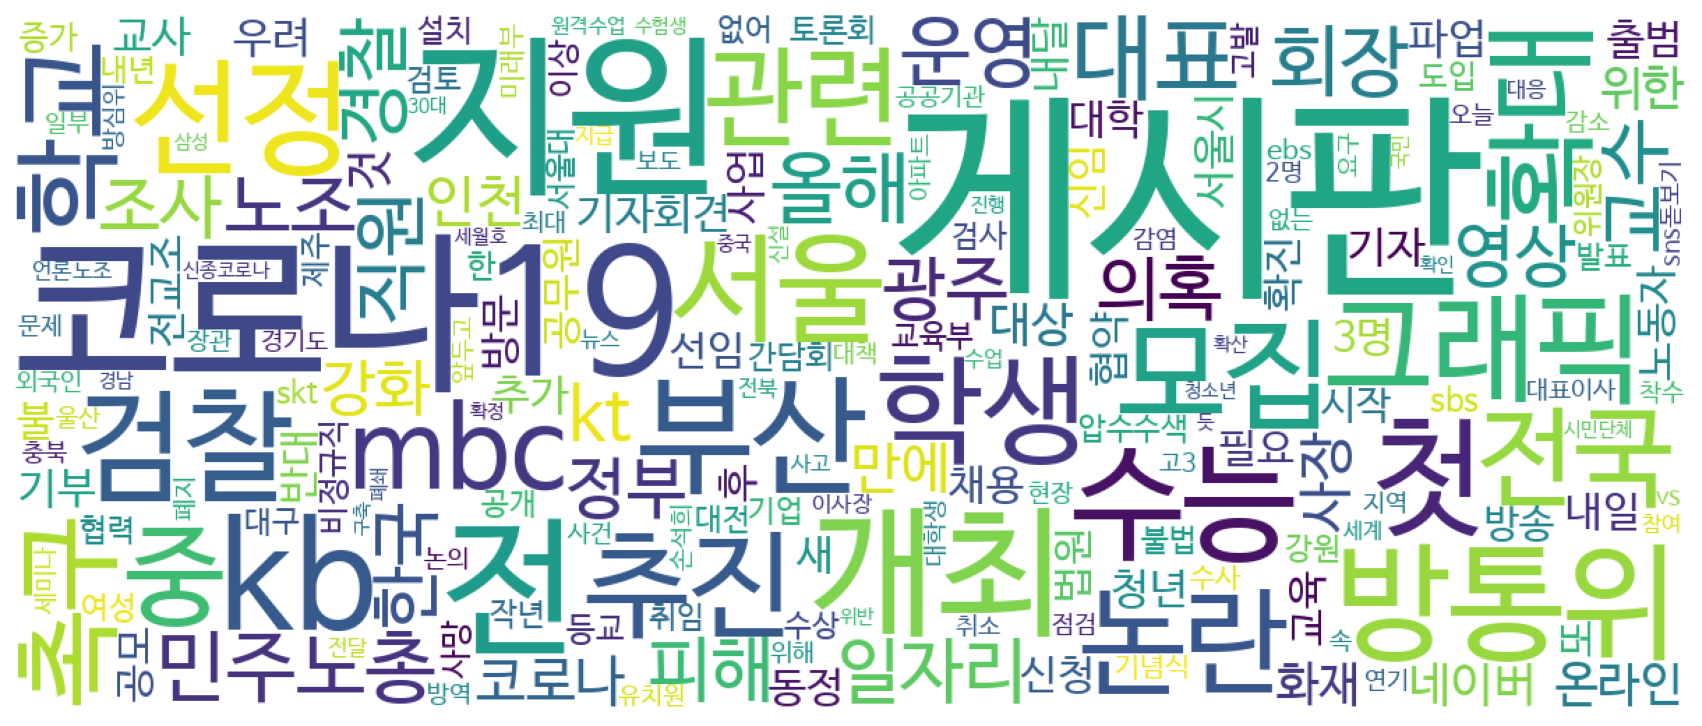

생활문화


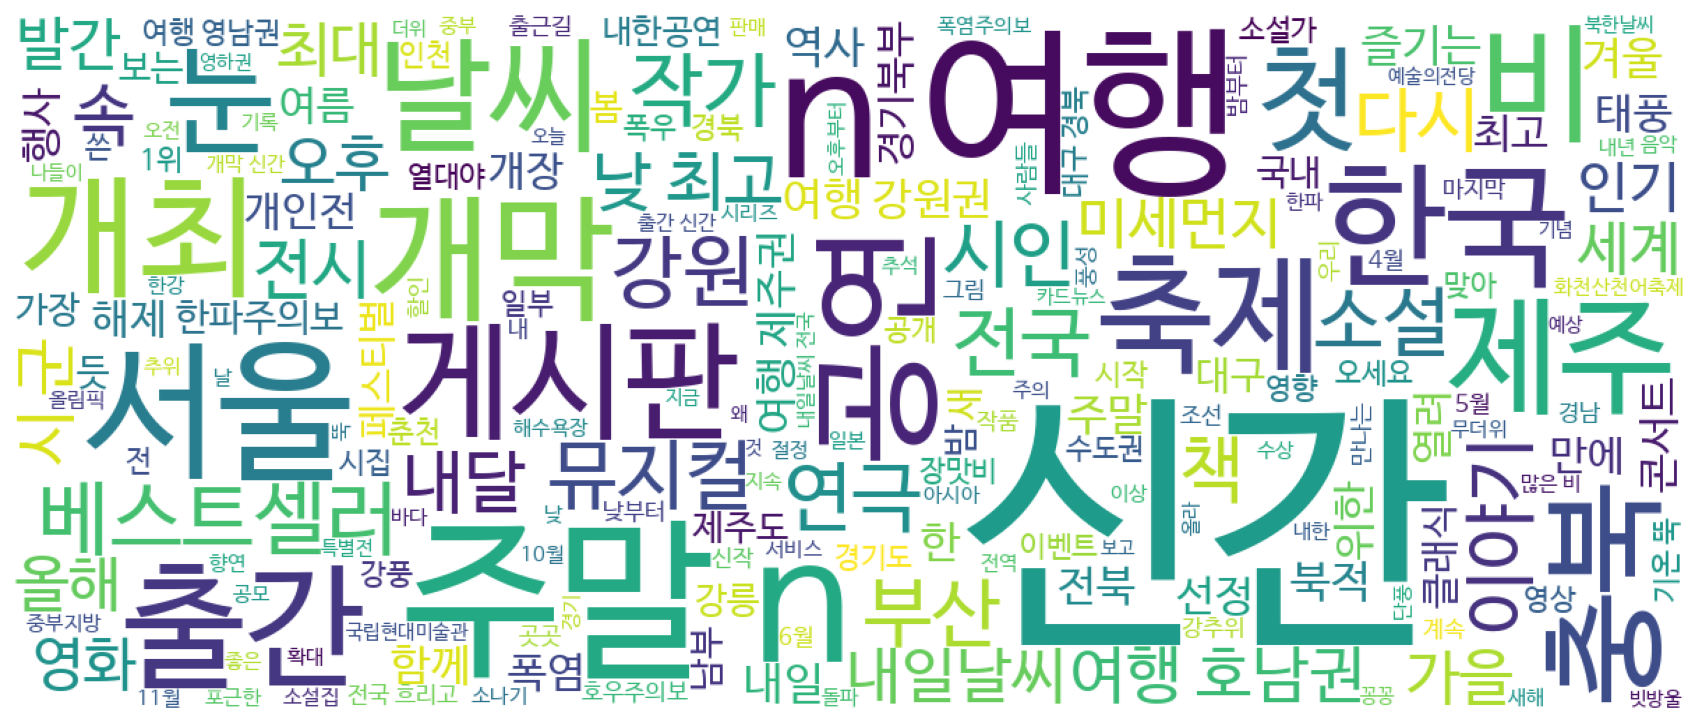

세계


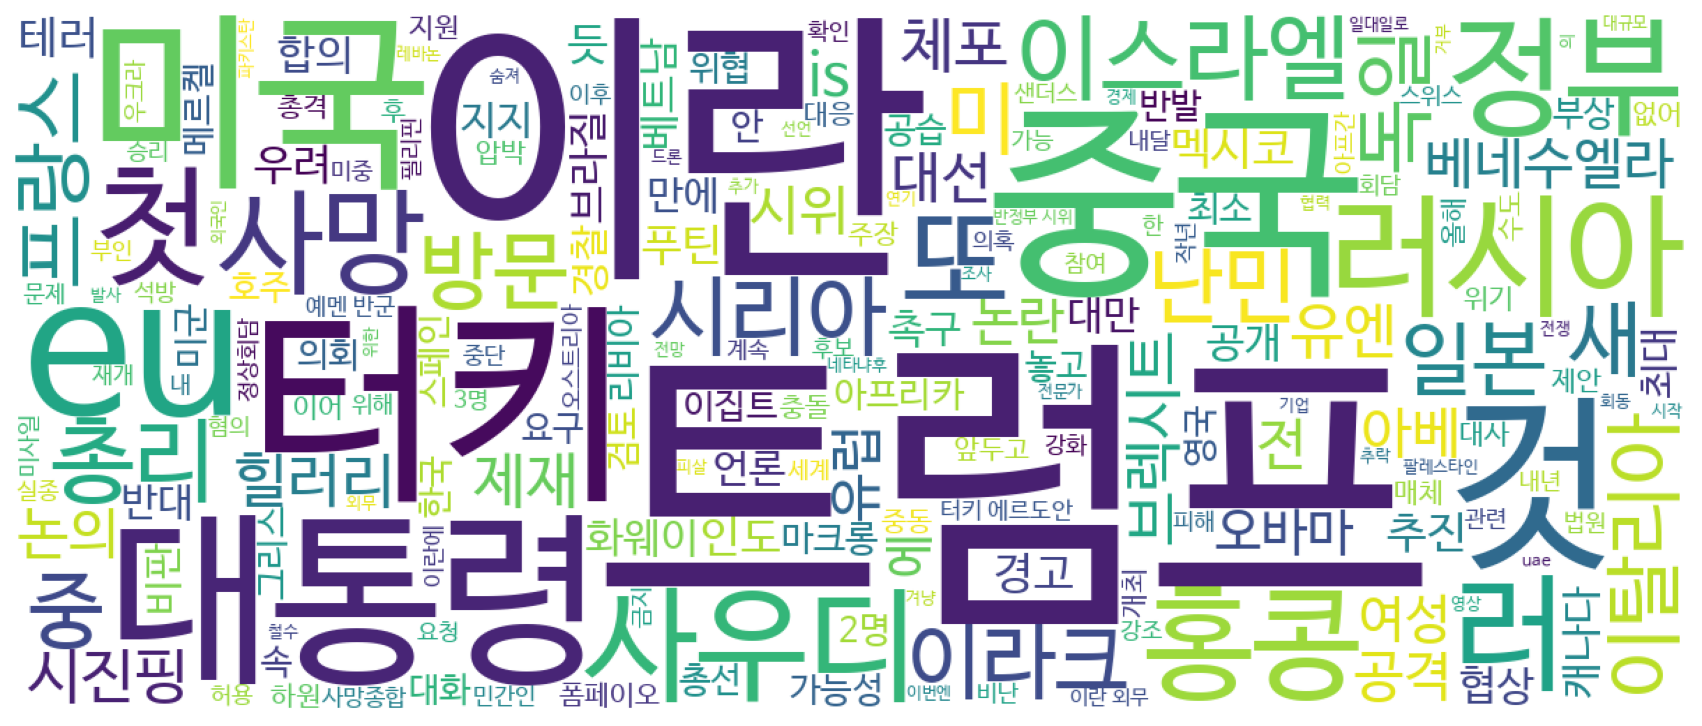

스포츠


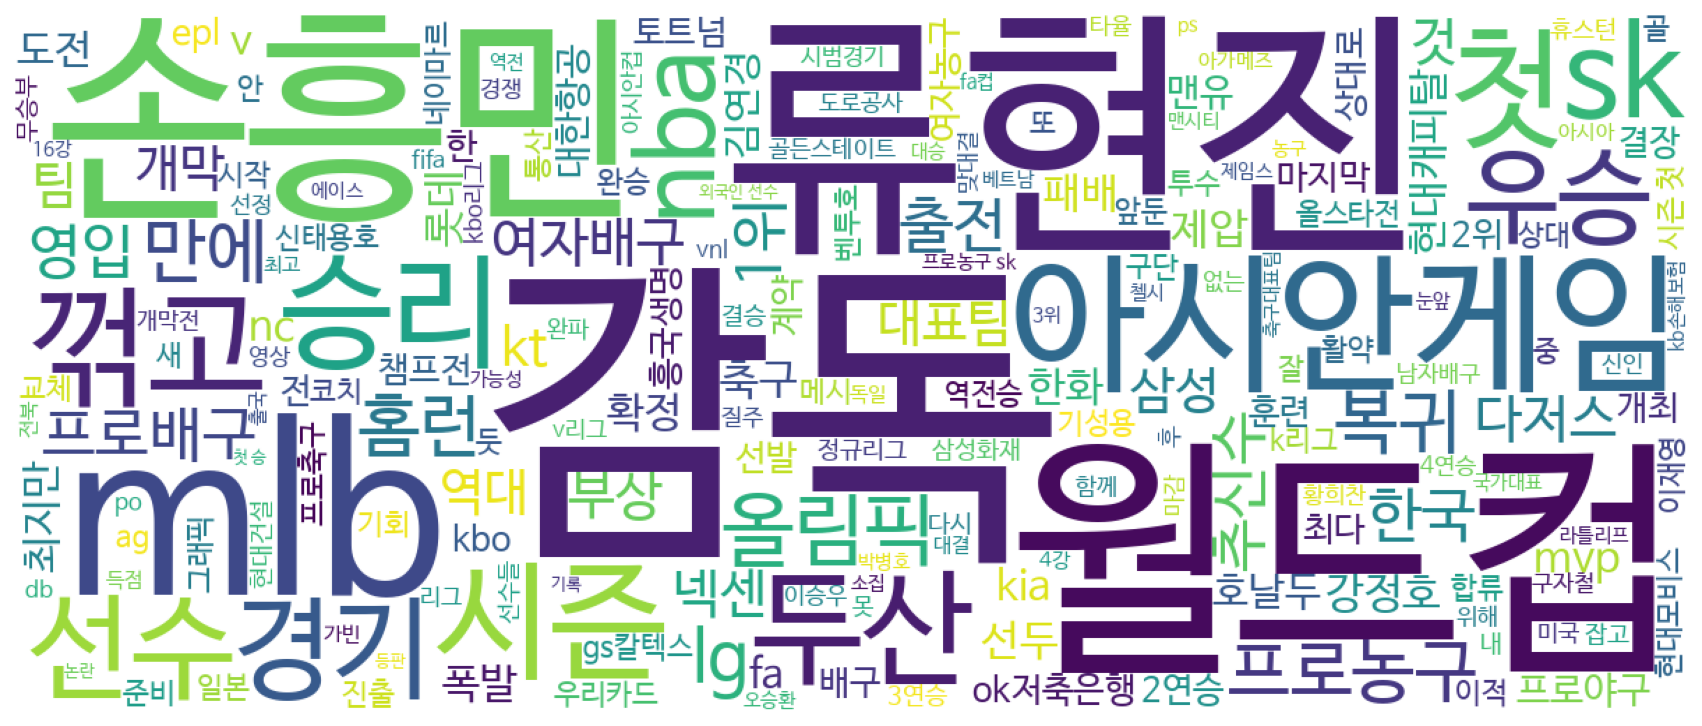

정치


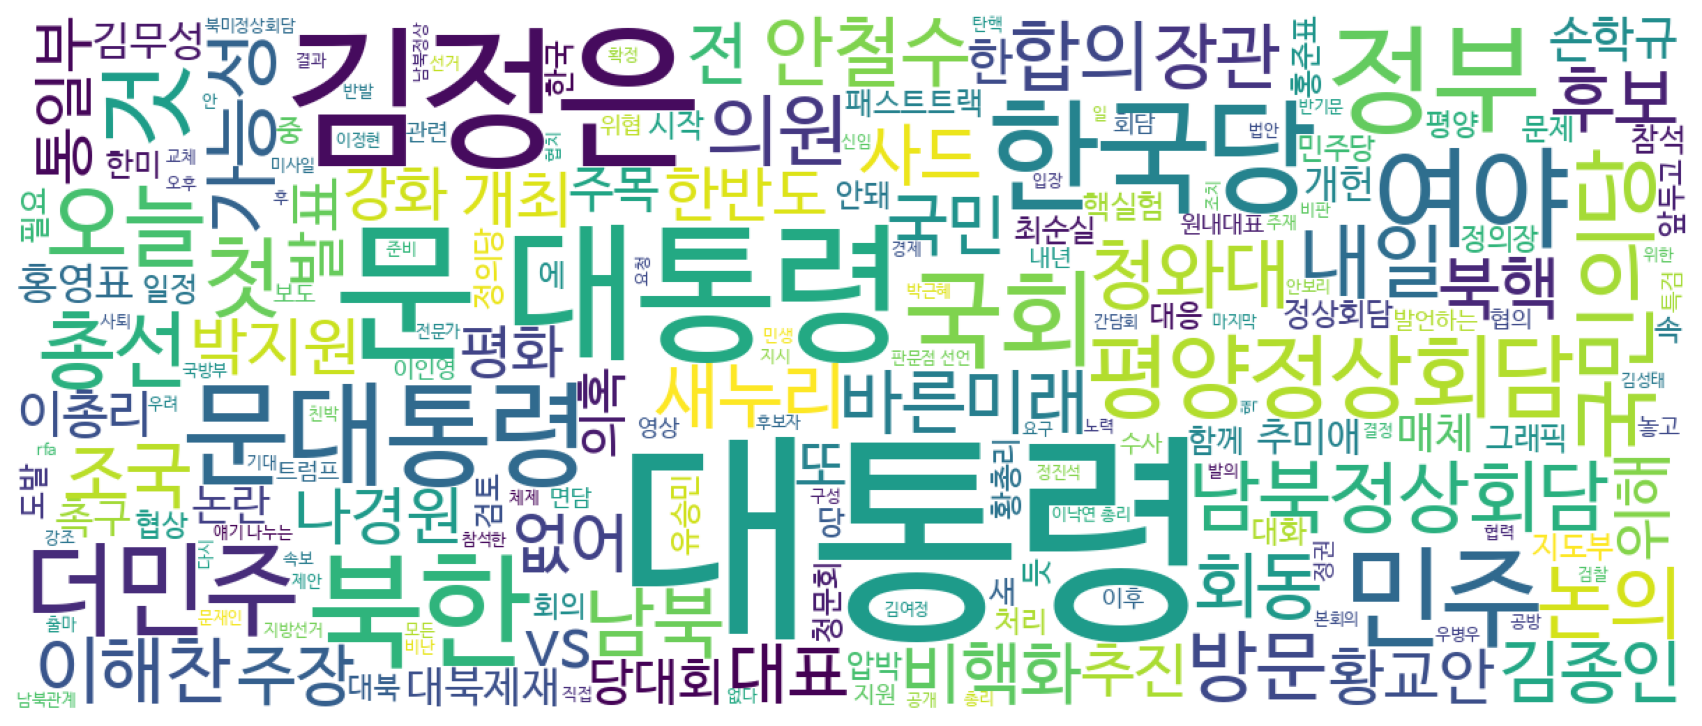

In [25]:
for tp in topic["topic"].unique():
    print(tp)
    display_word_cloud(" ".join(train.loc[train["topic"] == tp, "title"]))

# 3. 데이터 셋 만들기

In [26]:
X_train_text = train["title"]
X_test_text = test["title"]

In [27]:
label_name = "topic_idx"

In [28]:
y_train = train[label_name]

## TF-IDF (백터화)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfvect = TfidfVectorizer()
tfidfvect.fit(X_train_text)

TfidfVectorizer()

In [30]:
X_train = tfidfvect.transform(X_train_text)
X_test = tfidfvect.transform(X_test_text)

#4. 머신러닝

In [31]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [32]:
from sklearn.model_selection import cross_val_predict

y_predict = cross_val_predict(model, X_train, y_train, cv=3, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished


In [33]:
score = (y_train == y_predict).mean()
score

0.6834012353791563

In [34]:
y_test_predict = model.fit(X_train, y_train).predict(X_test)

In [35]:
submit = pd.read_csv(f"{base_path}sample_submission.csv")

In [36]:
submit["topic_idx"] = y_test_predict

In [37]:
file_name = f"{base_path}submit_{score}.csv"
submit.to_csv(file_name, index=False)

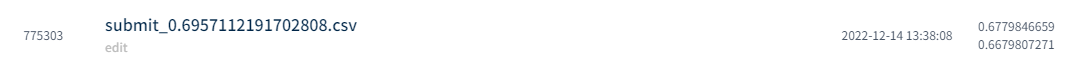